<a href="https://colab.research.google.com/github/ShykerBogdan/Prozzoro_project/blob/master/Main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import time
from datetime import datetime
import numpy as np

In [46]:

df=pd.read_csv('/content/gdrive/My Drive/ML_proz/all.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189122 entries, 0 to 189121
Data columns (total 18 columns):
average_activity        189122 non-null object
average_winner_price    166840 non-null float64
count_lots              189122 non-null int64
count_unique_hosts      79424 non-null float64
economy_percent         166826 non-null float64
economy_value           166826 non-null float64
favourite_host          189122 non-null int64
first_activity_days     189122 non-null object
last_activity_date      189122 non-null object
last_activity_days      189122 non-null object
lose                    189122 non-null int64
lose_open               189122 non-null int64
unique_id               189122 non-null object
unique_regions          189122 non-null int64
win                     189122 non-null int64
win_not_open            189122 non-null int64
win_open                189122 non-null int64
y                       189122 non-null int64
dtypes: float64(4), int64(9), object(5)
memory us

#Заповнення пустих значень в колонці count_unique_hosts


In [0]:
# correct 'count_unique_hosts'
df['count_unique_hosts']=df.apply(lambda raw: 1 if raw['count_lots']==1 else raw['count_unique_hosts'],axis=1)

In [0]:
# correct 'count_unique_hosts'
df['count_unique_hosts']=df.apply(lambda raw: 2 if raw['count_lots']==2 else raw['count_unique_hosts'],axis=1)

In [49]:
lots=df['count_lots'].value_counts().index
freq=dict()
for item in lots:
  freq[item]=np.nanmean(df[df['count_lots']==item]['count_unique_hosts'].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [0]:
freq

In [0]:
def correct_count_unique_hosts_mean(raw,freq):
  if pd.isnull(raw['count_unique_hosts']):
    raw['count_unique_hosts']=freq[raw['count_lots']]
  else:
    raw['count_unique_hosts']=raw['count_unique_hosts']
  return raw
df=df.apply(correct_count_unique_hosts_mean,args=(freq,),axis=1)
  

In [0]:
df['count_unique_hosts']=df.apply(lambda raw: 20 if pd.isnull(raw['count_unique_hosts']) else raw['count_unique_hosts'],axis=1)

In [54]:
sum(df['count_unique_hosts'].isnull())

0

# asdasdas


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189122 entries, 0 to 189121
Data columns (total 18 columns):
average_activity        189122 non-null object
average_winner_price    166840 non-null float64
count_lots              189122 non-null int64
count_unique_hosts      189122 non-null float64
economy_percent         166826 non-null float64
economy_value           166826 non-null float64
favourite_host          189122 non-null int64
first_activity_days     189122 non-null object
last_activity_date      189122 non-null object
last_activity_days      189122 non-null object
lose                    189122 non-null int64
lose_open               189122 non-null int64
unique_id               189122 non-null object
unique_regions          189122 non-null int64
win                     189122 non-null int64
win_not_open            189122 non-null int64
win_open                189122 non-null int64
y                       189122 non-null int64
dtypes: float64(4), int64(9), object(5)
memory u

In [0]:
df.drop(['average_winner_price','economy_percent','economy_value'],axis=1,inplace=True)

In [0]:
# remove 3 bad rows
df=df[df['last_activity_days']!='?']

In [0]:
df['last_activity_days']=df.apply(lambda raw: 0 if float(raw['last_activity_days'])<0 else raw['last_activity_days'],axis=1)

In [0]:
# scale to percent stats features


# Графік ( розподіл по унікальним регіонам)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
def group_unique_region(raw):
  n=raw['unique_regions']
  if n==1:
    raw['group_unique_regions']=str(n)
  elif n==2:
    raw['group_unique_regions']=str(n)
  elif n==3:
    raw['group_unique_regions']=str(n)
  elif n==4:
    raw['group_unique_regions']=str(n)
  elif n>=5 and n<10:
    raw['group_unique_regions']='5-10'
  elif n>=10 and n<15:
    raw['group_unique_regions']='10-15'
  elif n>=15 and n<20:
    raw['group_unique_regions']='15-20'
  else:
    raw['group_unique_regions']='>20'
  return raw

df=df.apply(group_unique_region,axis=1)
    

In [81]:
df['group_unique_regions'].value_counts()

1        141092
2         19695
5-10       8923
3          8005
4          4543
10-15      3083
>20        2199
15-20      1579
Name: group_unique_regions, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


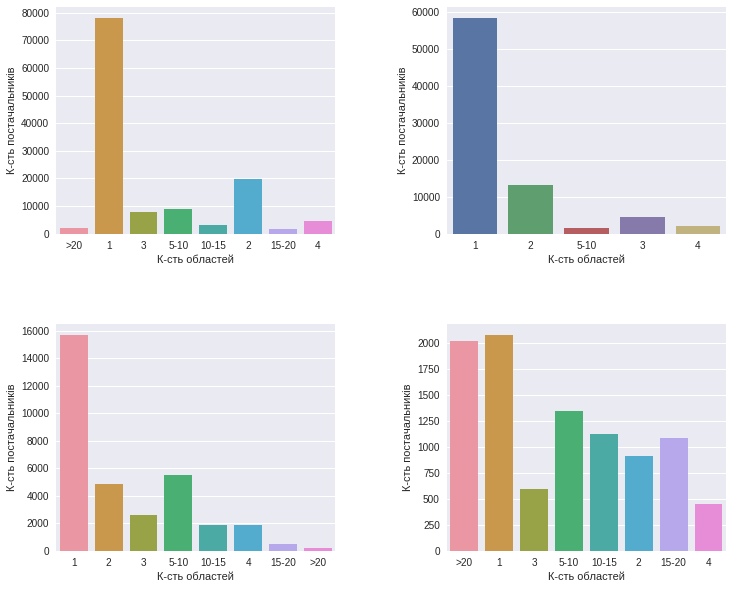

In [99]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
m=[(1,10000),(1,10),(10,50),(50,10000)]
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    sns.countplot(data=df[(df['count_lots']>m[i-1][0])&(df['count_lots']<m[i-1][1]) ], x = 'group_unique_regions')
    plt.xlabel('К-сть областей')
    plt.ylabel('К-сть постачальників')
plt.show()

In [0]:
df.to_excel('model_tableau.xlsx')

# 3. Heat map

In [0]:
df['last_activity_days']=df['last_activity_days'].astype(float)
# df['average_activity']=df['average_activity'].astype(float)
df['first_activity_days']=df['first_activity_days'].astype(float)

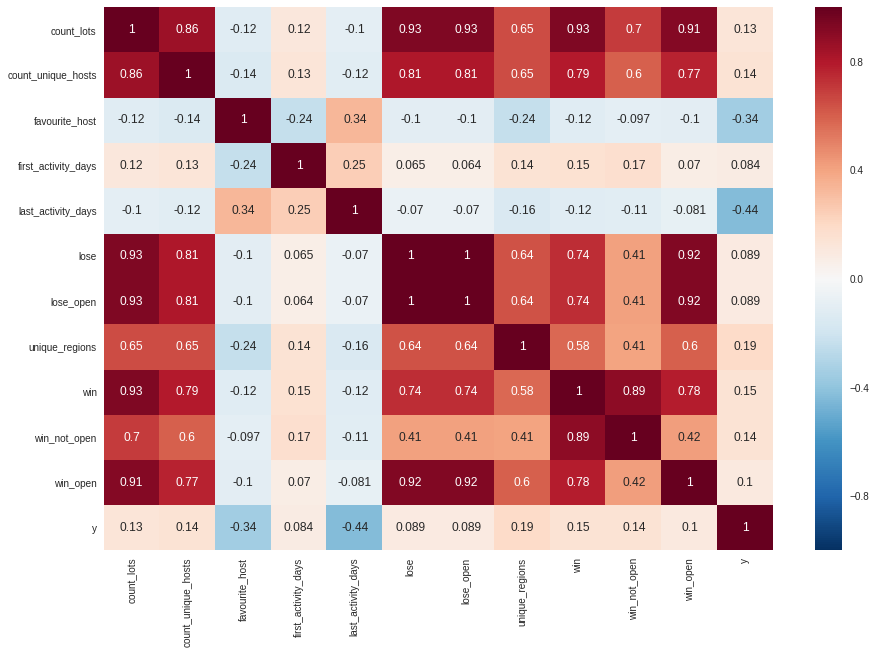

In [111]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()